 "A life spent making mistakes is not only more honorable, but more useful than a lifesp nt doin nothing. -George Bernard Shaw


(-0.5, 299.5, 365.5, -0.5)

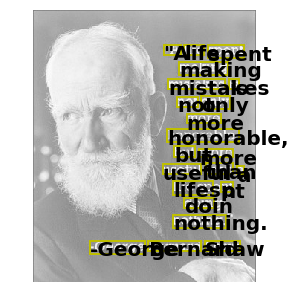

In [18]:
import requests

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "<subscription_key>"
assert subscription_key

vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

ocr_url = vision_base_url + "ocr"

image_url = "https://i.pinimg.com/originals/79/32/74/793274b1afae9be7a5cc7fbefd650ebf.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {'language': 'unk', 'detectOrientation': 'true'}
data    = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
text_in_line = ''
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    text_in_line = text_in_line + ' ' + text
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
print(text_in_line)
plt.axis("off")